In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import functools

In [3]:
Prices_hotel = "../../../datos/CM01_1/Prices_hotel_2021-03-01.csv"
Prices_hotel_dt = pd.read_csv(Prices_hotel)
Prices_hotel_filtered = Prices_hotel_dt.dropna()
df_competidores = Prices_hotel_filtered.groupby(['category']).mean()

Prices_search_date_grand_canary = "../../../datos/CM01_1/Prices_search_date_gran_canary_2021-03-01.csv"
Prices_search_date_grand_canary_dt = pd.read_csv(Prices_search_date_grand_canary)
Prices_search_date_grand_canary_filtered = Prices_search_date_grand_canary_dt.dropna()
df_islas= Prices_search_date_grand_canary_filtered.groupby(['category']).mean()

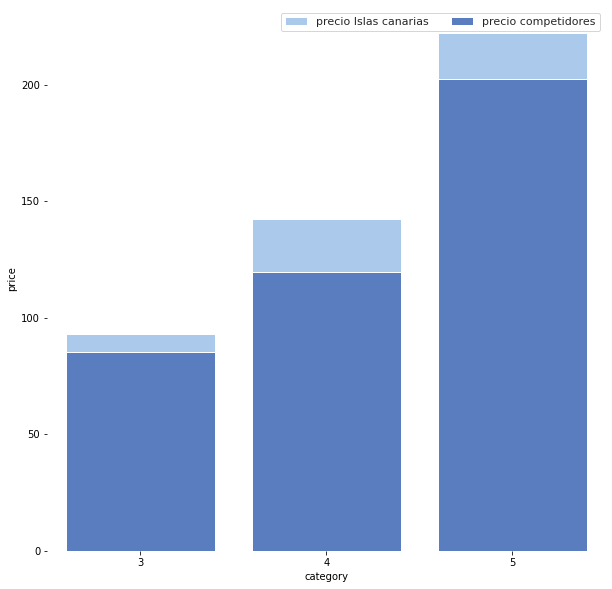

In [4]:
df_competidores.reset_index(inplace=True)
df_islas.reset_index(inplace=True)
f, ax = plt.subplots(figsize=( 10,10))


sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x='category', y='average_price', data=df_islas,label="precio Islas canarias", color="b")

sns.set_color_codes("muted")
sns.barplot(x='category', y='price', data=df_competidores,label="precio competidores", color="b")
ax.legend(ncol=2)

sns.despine(left=True, bottom=True)

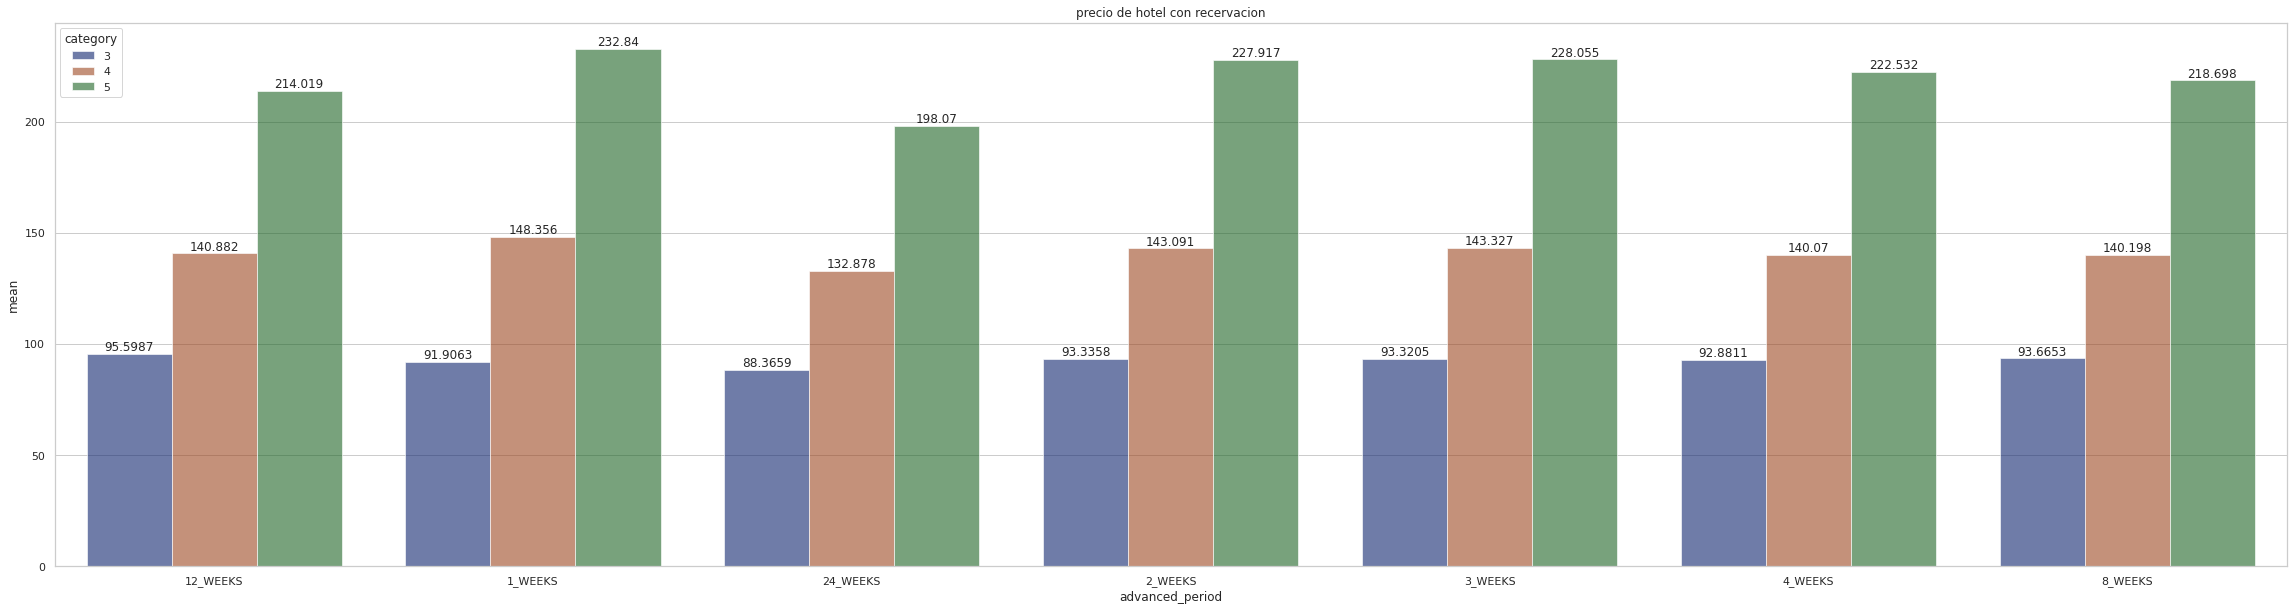

In [5]:
Prices_search_date_grand_canary_filtered.groupby(['category','advanced_period']).mean()


df = Prices_search_date_grand_canary_filtered.groupby(['category','advanced_period']).agg(mean=('average_price', 'mean'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sns.barplot(x="advanced_period",
           y="mean",
           hue="category",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('precio de hotel con recervacion')

for container in ax.containers:
    ax.bar_label(container)